Plot 1 - Roads Map and Legend
---
The NEON SJER field site is located in California. Your first task is to explore the area by creating a map of California roads that has symbology that represents different road types.

Open the roads layer, clip the data and create a geodataframe
Open the california/madera-county-roads/tl_2013_06039_roads.shp file located in your spatial-vector-lidar data download using GeoPandas.

Crop the geodataframe using the SJER boundary (california/neon-sjer-site/vector_data/SJER_crop.shp) layer. Name your clipped roads object: sjer_roads_cl.

Open the SJER plot locations data (california/neon-sjer-site/vector_data/SJER_plot_centroids.shp). Name your SJER plot locations object: sjer_plots.

Create a map that shows the cropped madera roads layer, SJER plot locations and the SJER boundary (california/neon-sjer-site/vector_data/SJER_crop.shp).
Important Notes:

Plot the roads so different road types are represented using unique symbology using the RTTYP attribute.

Add the plot locations to your map. Color each location according to the attribute plot type using unique symbology for each plot_type in the data.
Add a title to your plot.

Be sure that your plot legend is not covering your final map.

IMPORTANT: be sure that all of the data are within the same EXTENT and crs of the SJER boundary layer. This means that you have to crop and reproject your data prior to plotting it!
Warning to Ignore

NOTE: you can ignore the warning from pyproj: '+init=<authority>:<code>' syntax is deprecated., which will be resolved by an update to GeoPandas in the next release.

In [ ]:
# RUN - no questions asked! Tem que instalar esses paranaues pq é o google colab
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

import os
os.chdir('spatialindex-src-1.8.5')

!./configure
!make
!make install

!pip install rtree
!ldconfig

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   438k      0  0:00:01  0:00:01 --:--:--  438k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [ ]:
# install necessary packages - Instala os pacotinhos para usar shp´s
!pip install geopandas
!pip install mapclassify
#Já faz o rolê de linkar o google drive para puxar os dados
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
# your path preffix
my_path = '/content/drive/MyDrive/Materia Phyton/Aula 7'
# Importa mais bibliotécas
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os
# Set working directory to your earth-analytics dir
plt.ion()
#Já puxa o dados tbm pq não sou bobo
sjer_roads = gpd.read_file(my_path + "/california/madera-county-roads/tl_2013_06039_roads.shp")


In [ ]:
# aoi stands for area of interest (importa o outro arquivo de interesse)
sjer_aoi = gpd.read_file(my_path + "/california/neon-sjer-site/vector_data/SJER_crop.shp")
#Checa se tem o memos CRS pra não dar BO
print(sjer_roads.crs)
print(sjer_aoi.crs)
#Não tem, agora tem que projetar um no outro

EPSG:4269
EPSG:32611


In [ ]:
# reproject the aoi to match the roads layer
sjer_aoi_wgs84 = sjer_aoi.to_crs({"init": "epsg:4269"})
# sjer_aoi_wgs84 = sjer_aoi.to_crs(sjer_roads.crs)
#Agora faz o cropizinho
sjer_boundary = gpd.read_file(my_path + '/california/neon-sjer-site/vector_data/SJER_crop.shp')


/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# Load the SJER plot locations
sjer_plots = gpd.read_file(my_path + "/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp")
#ai vê o CRS desse role ai
print(sjer_roads.crs)
print(sjer_aoi_wgs84.crs)
print(sjer_plots.crs)
#tem que mudar o do sjer tbm
sjer_plots_wgs84 = sjer_plots.to_crs({"init": "epsg:4269"})
print(sjer_roads.crs)
print(sjer_aoi_wgs84.crs)
print(sjer_plots_wgs84.crs)




EPSG:4269
+init=epsg:4269 +type=crs
EPSG:32611
EPSG:4269
+init=epsg:4269 +type=crs
+init=epsg:4269 +type=crs


/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


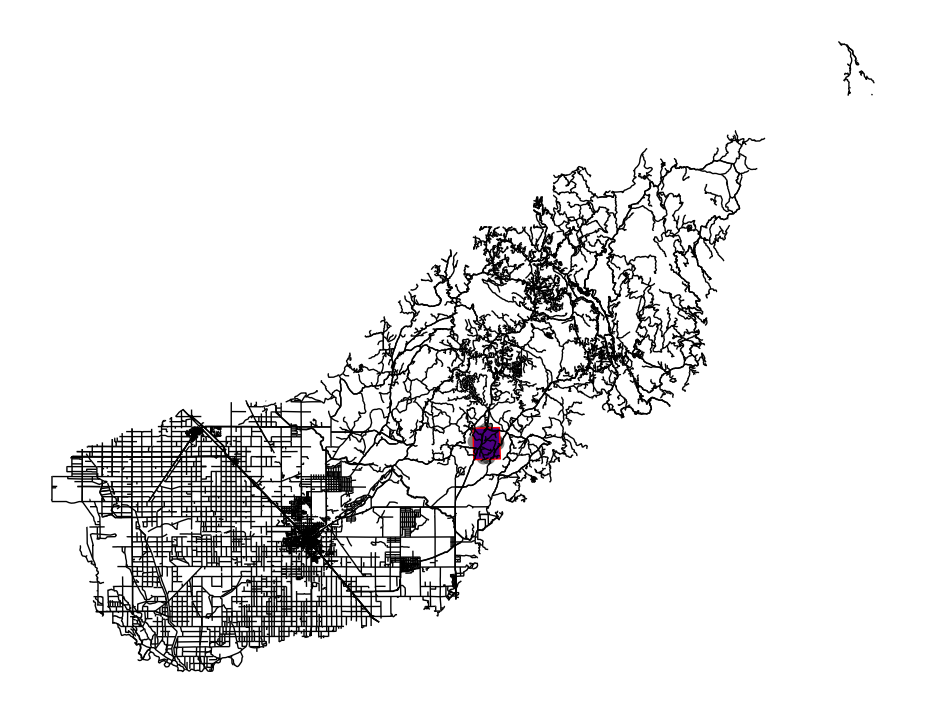

In [ ]:
#Agora só criar o mapitows
fig, ax = plt.subplots(figsize=(12, 9))

# plot the data

sjer_roads.plot(ax = ax,
                       edgecolor = "black",
                       linewidth = 1)

sjer_plots_wgs84.plot(ax = ax,
                         alpha = 0.5,
                         edgecolor = "black",
                         color = "white",
                         linewidth = 4)

sjer_aoi_wgs84.plot(ax = ax,
                    color = "indigo",
                    edgecolor = 'r')

# add title to map
# ax.set(title = "US State Boundaries")

# turn off the axis
ax.set_axis_off()
plt.show()

In [ ]:
#Agora tem que clipar o paranaué
# Simplify the geometry of the clip extent for faster processing
# Use this with caution as it modifies your data.
sjer_aoi_wgs84_sim = sjer_aoi_wgs84.simplify(.2,
                                                       preserve_topology = True)
sjer_roads_cl = gpd.clip(sjer_roads,
                         sjer_aoi_wgs84_sim)
~sjer_roads_cl.is_empty
# Ignore missing/empty geometries
sjer_roads_cl = sjer_roads_cl[~sjer_roads_cl.is_empty]



<ipython-input-45-e15d47959153>:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: +init=epsg:4269 +type=crs

  sjer_roads_cl = gpd.clip(sjer_roads,


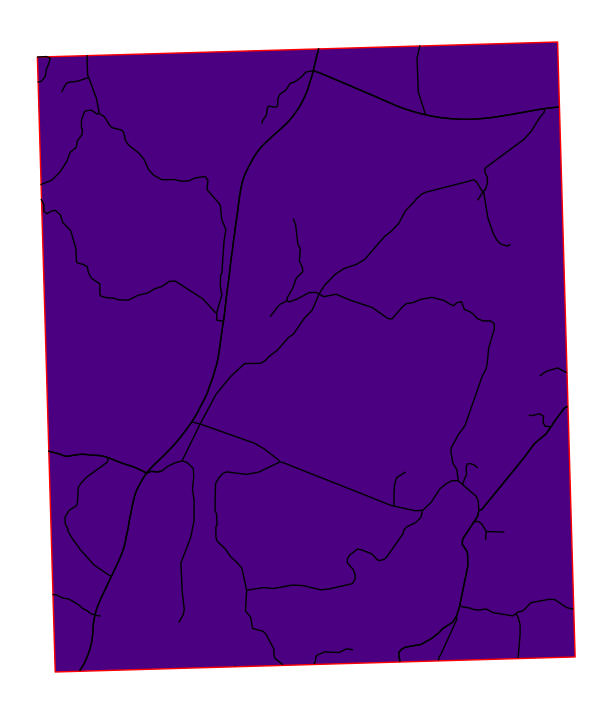

In [ ]:
#testando aqui pq tava dando BO
#sjer_roads_cl.head()
#agora plota o mapa meu amiguxo

fig, ax = plt.subplots(figsize=(12, 9))
sjer_roads_cl.plot(ax = ax,
                       edgecolor = "black",
                       linewidth = 1)

sjer_plots_wgs84.plot(ax = ax,
                         alpha = 0.5,
                         edgecolor = "black",
                         color = "white",
                         linewidth = 4)

sjer_aoi_wgs84.plot(ax = ax,
                    color = "indigo",
                    edgecolor = 'r')

# add title to map
# ax.set(title = "US State Boundaries")

# turn off the axis
ax.set_axis_off()
plt.show()

Plot 2 - Roads in Del Norte, Modoc & Siskiyou Counties
---
Create a plot of roads that are located in: Del Norte, Modoc & Siskiyou Counties. To do this, you will need the following layers:

Counties in California: california/CA_Counties/CA_Counties_TIGER2016.shp
Roads: global/ne_10m_roads/ne_10m_roads.shp
To create this plot, you will need to:

Select the three counties that you want to work with in the counties dataset. One fast way to do this is using syntax as follows:
roads_df[roads_df['NAME'].isin(["Siskiyou", "Modoc", "Del Norte"])]

Name your county boundaries object: three_counties.

Clip the roads data to the boundary of the counties that you wish to look at.
Assign each road segment an attribute that identifies it as within each county.
Color the roads in each county using a unique color.

HINT: use the legend=True argument in .plot() to create a legend. Because you are only creating a legend for one layer, you can quickly use .plot() rather than ax.legend() which is what you used above!

IMPORTANT:
Name your final county boundaries object: three_counties.
Both layers need to the in the SAME coordinate reference system for you to work with them together. REPROJECT both data layers to albers .to_crs(epsg=5070)
Clip the roads to the boundary of the three_counties layer that you created which only contains the 3 selected counties: "Siskiyou", "Modoc", "Del Norte"
To assign each road to its respective county, you will perform a spatial join using .sjoin().
You will need to redefine the CRS of the roads layer, after the clip, which you can do using something like:
county_roads.crs = ca_cty_albers.crs

NOTE: you can ignore the warning from pyproj: '+init=<authority>:<code>' syntax is deprecated., which will be resolved by GeoPandas in the next release.

In [ ]:
#Já puxa o dados tbm pq não sou bobo
ca_counties = gpd.read_file(my_path + "/california/CA_Counties/CA_Counties_TIGER2016.shp")
roads = gpd.read_file(my_path + "/global/ne_10m_roads/ne_10m_roads.shp")
#Olha as CRS´s
print(ca_counties.crs)
print(roads.crs)
# Pediu pra porjetar as duas no epsg=5070
ca_counties_5070 = ca_counties.to_crs({"init": "epsg:5070"})



EPSG:3857
EPSG:4326


/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
#Vou passar pra ca senão demora muito pra rodar
# Pediu pra porjetar as duas no epsg=5070
#ca_counties_5070 = ca_counties.to_crs({"init": "epsg:5070"})
roads_5070 = roads.to_crs({"init": "epsg:5070"})



In [ ]:
#Vou printar só pra ver como tá o rolê
#ca_counties_5070.head()
#A coluna é name mesmo
#ca_counties_5070[ca_counties_5070['NAME'].isin(["Siskiyou", "Modoc", "Del Norte"])]
three_counties = ca_counties_5070[ca_counties_5070['NAME'].isin(["Siskiyou", "Modoc", "Del Norte"])]
#hora do clip
three_counties_sim = three_counties.simplify(.2,
                                                       preserve_topology = True)
roads_clip = gpd.clip(roads_5070,
                         three_counties_sim)
~roads_clip.is_empty
# Ignore missing/empty geometries
roads_clip = roads_clip[~roads_clip.is_empty]
#vamo vê o que deu né
#roads_clip.head()



,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
1135,6,Road,Secondary Highway,USA,NaN,"Version 1.5: Changed alignment, a few adds in ...",395,NaN,NaN,NaN,...,0,0,NaN,100105,North America,0,Federal,6.0,7.9,"LINESTRING (-2017325.606 2281182.041, -2013801..."
49044,7,Road,Secondary Highway,USA,NaN,New in version 2.0.0,89,NaN,NaN,NaN,...,0,393,NaN,5798,North America,0,State,7.0,8.6,"LINESTRING (-2114248.307 2307338.593, -2115663..."
48916,7,Road,Road,USA,NaN,New in version 2.0.0,NaN,NaN,NaN,NaN,...,0,266,NaN,3332,North America,0,Other,7.0,8.6,"LINESTRING (-1980349.989 2311452.676, -1981234..."
52,7,Road,Secondary Highway,USA,NaN,"Version 1.5: Changed alignment, a few adds in ...",299,NaN,NaN,NaN,...,0,0,NaN,79205,North America,0,State,7.0,8.6,"LINESTRING (-2011102.587 2316513.367, -2016199..."
3767,3,Road,Major Highway,USA,NaN,New in version 2.0.0,5,NaN,NaN,NaN,...,0,0,NaN,79405,North America,1,Interstate,3.0,6.0,"LINESTRING (-2160474.490 2320495.814, -2157854..."


In [ ]:
#Vamos checar o CRS
#print(roads_clip.crs)
#To me sentindo quando vai montar alguma coisa e "sobra peça", no enunciado do exercício falou que tinha que reprojetar depois de clipar, mas aparentemente não...
# Perform spatial join to assign roads to counties
county_roads = gpd.sjoin(roads_clip, three_counties, how="left", op="intersects")

# Rename the 'NAME' column to 'County'
county_roads = county_roads.rename(columns={"NAME": "County"})


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


<Axes: >

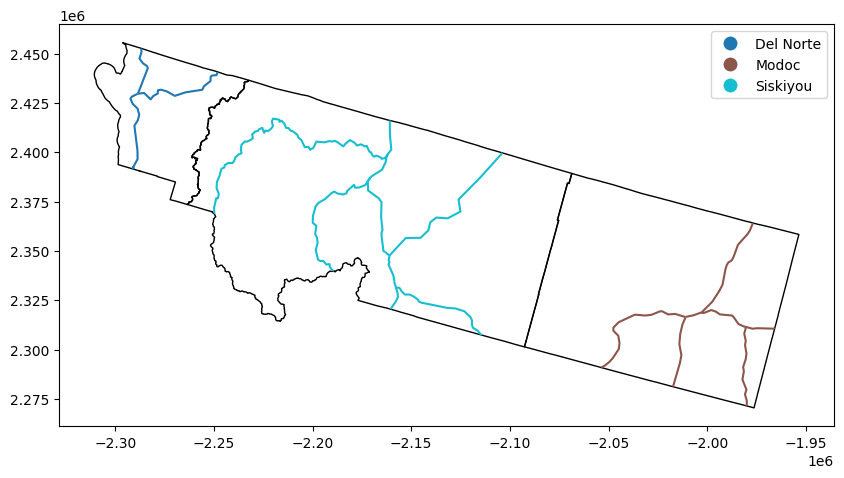

In [ ]:
#plota agora
ax = three_counties.plot(color="none", edgecolor="black", figsize=(10,10), legend=True)
county_roads.plot(column="County", ax=ax, legend=True)
#pra mim ta perfeito (fora o baile)

Table 1 - Calculate Total Length of Road Siskiyou, Modoc, Del Norte County in California
Create a geodataframe that shows the total length of road in these counties used in plot 2: Siskiyou, Modoc, and Del Norte. To calculate this, use the data you created for plot 2.

To calculate length of each line in your geodataframe, you can use the syntax gdf.length. Create a new column using the syntax:

gdf["length"] = gdf.length

You can summarize the data to calculate total length using pandas .groupby() on the county column name.

Note: you can use: pd.options.display.float_format = '{:.4f}'.format if you'd like to turn off scientific notation for your outputs.

IMPORTANT: Name your final summary GeoDataframe: cali_roads_summary.

it should look something like this:

In [ ]:
import pandas as pd
# Calculate length of each road segment
county_roads["length"] = county_roads.length

# Group by county and calculate total length
cali_roads_summary = county_roads.groupby("County").agg({"length": "sum"})

# Format the output to display the total length in miles
pd.options.display.float_format = '{:.4f}'.format
cali_roads_summary["length"] = cali_roads_summary["length"] / 1609.344
cali_roads_summary = cali_roads_summary.rename(columns={"length": "Total Length (miles)"})

cali_roads_summary.head()

,Total Length (miles)
County,
Del Norte,75.3771
Modoc,152.2542
Siskiyou,293.5531


Plot 3 - Global Total Estimated Population and Mean Population Rank
---
Create a plot of quantile maps of global estimated population by region. To do this, you will use the following layers:

Download the natural earth data from the following URL:
https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip

The URL below might look odd as it has two "http" strings in it, but it is how the url's are organized on natural earth and should work.

Recall that using et.data.get_data(url=url) will download the data to the following directory: earth-analytics/data/earthpy-downloads/

After you have downloaded the data, import the data and

subset the data to include the following columns: ["REGION_WB", "CONTINENT", "POP_RANK","POP_EST", 'geometry']
Dissolve the data by region (REGION_WB) column and aggregate by sum and mean.
HINT: you can provide the aggfun= argument with a [list] of function names in quotes and it will summarize numeric columns using each function.
Create a figure with two plots:
a. Plot 1 - sum estimated population (POP_EST) by region.
a. Plot 2 - mean population rank (POP_RANK) by region.
NOTE: you can ignore the warning from merge: UserWarning: merging between different levels can give an unintended result.

In [ ]:
!pip install matplotlib==3.1.3 #Para o gráfico funcionar teve que rodar esse versão
!pip install earthpy
import geopandas as gpd
import earthpy as et
import matplotlib.pyplot as plt



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 417, in run
    _, build_failures = build(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 320, in build
    wheel_file = _build_one(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 194, in _build_one
    wheel_path = _build_one_inside_env(
  File "/usr/loc

In [ ]:
# Download and extract the data (manualmente pq pode né)


# Read in the data, and subset to include the desired columns
admin_data = gpd.read_file(my_path + "/ne_10m_admin_0_countries.shp")[["REGION_WB", "CONTINENT", "POP_RANK","POP_EST", 'geometry']]

# Dissolve by region, and aggregate by sum and mean
admin_data = admin_data.to_crs(epsg=6933)
admin_data_dissolve = admin_data.dissolve(by='REGION_WB', aggfunc=['sum', 'mean'])

/usr/local/lib/python3.9/dist-packages/geopandas/geodataframe.py:1676: FutureWarning: ['CONTINENT'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


In [ ]:
#admin_data.head()
admin_data_dissolve.head()


KeyError: ignored

NameError: ignored

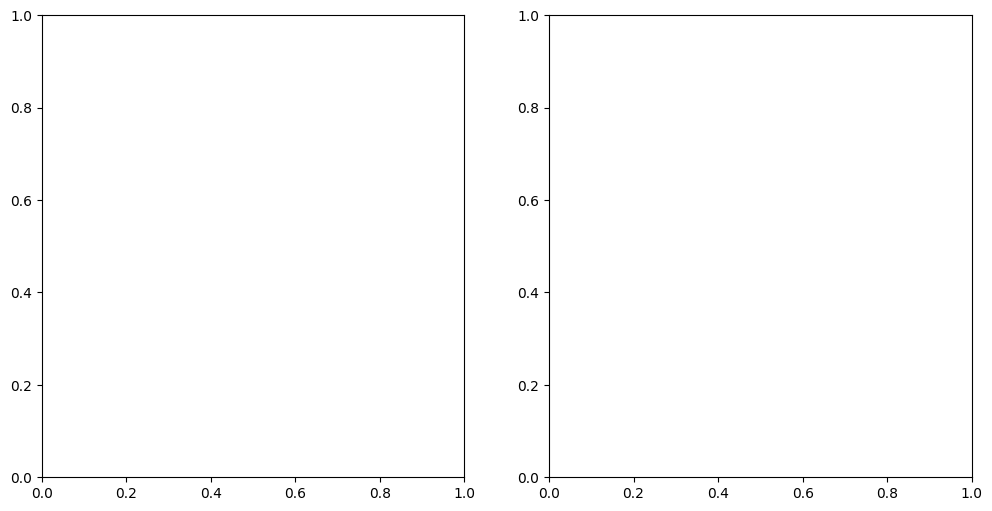

In [ ]:
# Create the figure
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

# Plot the sum estimated population by region
admin_data_dissolve.plot(column=('POP_EST', 'sum'),
                         cmap='YlOrRd',
                         linewidth=0.5,
                         ax=ax1,
                         edgecolor='black',
                         legend=True)
ax1.set_title('Total Estimated Population by Region')

# Plot the mean population rank by region
admin_data_dissolve.plot(column=('POP_RANK', 'mean'),
                         cmap='YlGn',
                         linewidth=0.5,
                         ax=ax2,
                         edgecolor='black',
                         legend=True)
ax2.set_title('Mean Population Rank by Region')

plt.tight_layout()
plt.show()